In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [1]:
import kid_readout.analysis.noise_measurement

updated file list


:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [53]:
pkls = kid_readout.analysis.noise_measurement.load_noise_pkl('/data/readout/pkl/2015-06-15_190712_mmw.pkl')

In [111]:
pklstin = kid_readout.analysis.noise_measurement.load_noise_pkl('/data/readout/pkl/2015-09-11_150633_mmw.pkl')

In [84]:
pfstin = [pkl for pkl in pklstin if pkl.timestream_modulation_duty_cycle==0.5]

In [85]:
p0 = pklstin[0]

In [86]:
len(pfstin)

32

In [87]:
p0.mmw_atten_turns

array([ 7.5,  7.5])

In [79]:
len(pkls)

160

In [54]:
pfs = [pkl for pkl in pkls if pkl.timestream_modulation_duty_cycle==0.5]

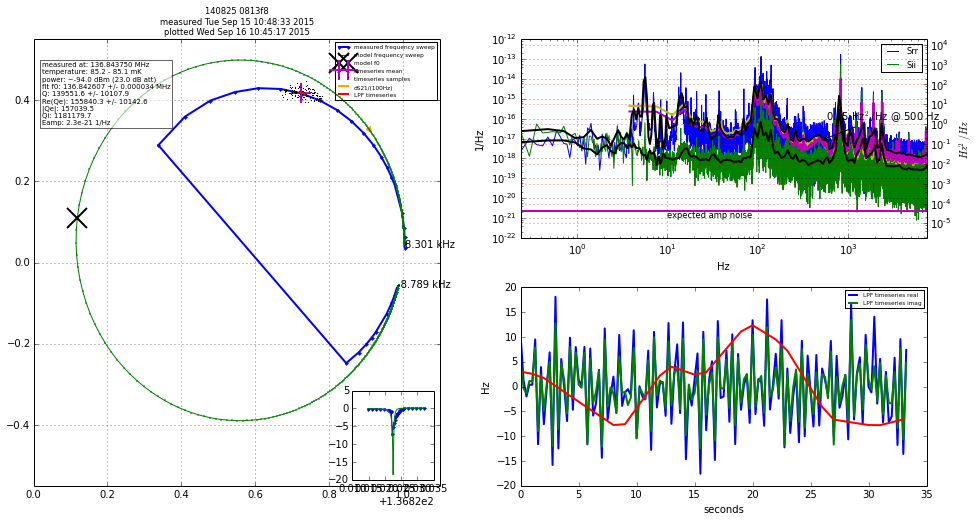

In [93]:
blah =pklstin[151].plot()

0.5
0.5


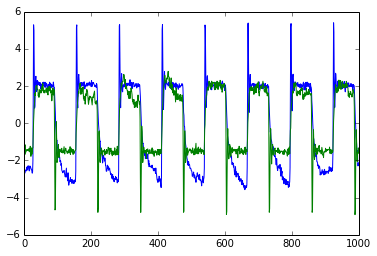

In [119]:
for pkl in pklstin:
    if pkl.resonator_index==1:
        if pkl.timestream_modulation_duty_cycle==0.5:#pkl.atten==41.0:
            #loglog(pkl.pca_freq,pkl.pca_eigvals[1,:])
            plot(pkl.fractional_fluctuation_timeseries.real[1000:2000]*1e6)
            #plot(pkl.fractional_fluctuation_timeseries.imag[1000:2000])
            print pkl.timestream_modulation_duty_cycle
            #loglog(pkl.pca_freq,pkl.pca_eigvals[0,:])
            

In [55]:
len(pfs)

32

In [56]:
p0 = pfs[0]

In [57]:
p0.mmw_atten_turns

array([ 7.,  7.])

In [260]:
p0.folded_projected_timeseries.shape

(128,)

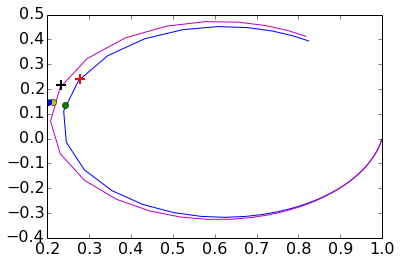

In [261]:
for p0 in pfs[11::16]:
    plot(p0.resonator_model.normalized_model(p0.sweep_model_freqs_MHz).real,p0.resonator_model.normalized_model(p0.sweep_model_freqs_MHz).imag)
    plot(p0.resonator_model.normalized_model(p0.resonator_model.f_0).real,p0.resonator_model.normalized_model(p0.resonator_model.f_0).imag,'o')
    plot(p0.resonator_model.normalized_model(p0.noise_measurement_freq_MHz).real,p0.resonator_model.normalized_model(p0.noise_measurement_freq_MHz).imag,'+',markersize=10,mew=2)
    plot(p0.folded_normalized_timeseries.real,p0.folded_normalized_timeseries.imag,'.')

In [262]:
p0.resonator_model.f_0

165.47454558058263

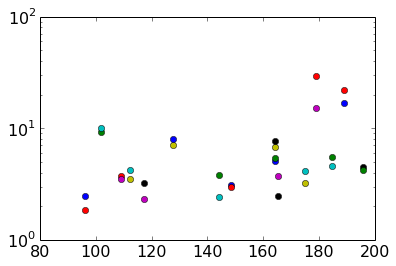

In [263]:
for p0 in pfs:
    semilogy(p0.resonator_model.f_0,p0.folded_projected_timeseries.imag.ptp(),'o')
#ylim(0,2000)

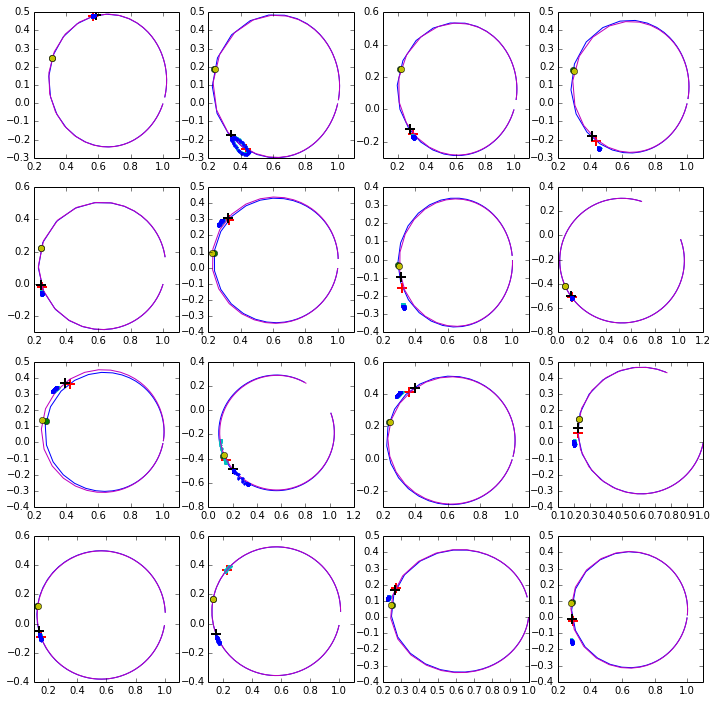

In [58]:
fig,axs = plt.subplots(4,4,figsize=(12,12))
for k in range(16):
    ax= axs.flatten()[k]
    for p0 in pfs[k::16]:
        ax.plot(p0.resonator_model.normalized_model(p0.sweep_model_freqs_MHz).real,p0.resonator_model.normalized_model(p0.sweep_model_freqs_MHz).imag)
        ax.plot(p0.resonator_model.normalized_model(p0.resonator_model.f_0).real,p0.resonator_model.normalized_model(p0.resonator_model.f_0).imag,'o')
        ax.plot(p0.resonator_model.normalized_model(p0.noise_measurement_freq_MHz).real,p0.resonator_model.normalized_model(p0.noise_measurement_freq_MHz).imag,'+',markersize=10,mew=2)
        ax.plot(p0.folded_normalized_timeseries.real,p0.folded_normalized_timeseries.imag,'.')


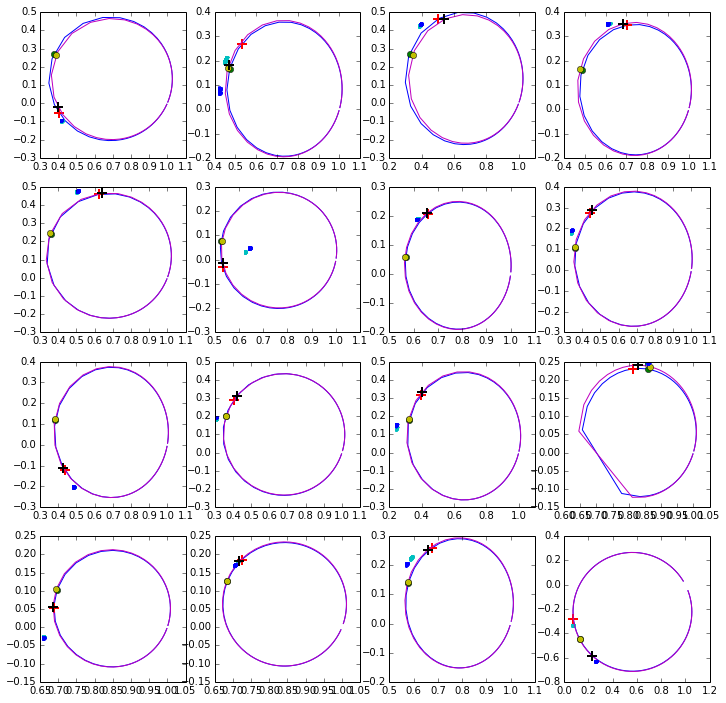

In [67]:
fig,axs = plt.subplots(4,4,figsize=(12,12))
for k in range(16):
    ax= axs.flatten()[k]
    for p0 in pfstin[k::16]:
        ax.plot(p0.resonator_model.normalized_model(p0.sweep_model_freqs_MHz).real,p0.resonator_model.normalized_model(p0.sweep_model_freqs_MHz).imag)
        ax.plot(p0.resonator_model.normalized_model(p0.resonator_model.f_0).real,p0.resonator_model.normalized_model(p0.resonator_model.f_0).imag,'o')
        ax.plot(p0.resonator_model.normalized_model(p0.noise_measurement_freq_MHz).real,p0.resonator_model.normalized_model(p0.noise_measurement_freq_MHz).imag,'+',markersize=10,mew=2)
        ax.plot(p0.folded_normalized_timeseries.real,p0.folded_normalized_timeseries.imag,'.')


In [13]:
import kid_readout.analysis.resonator

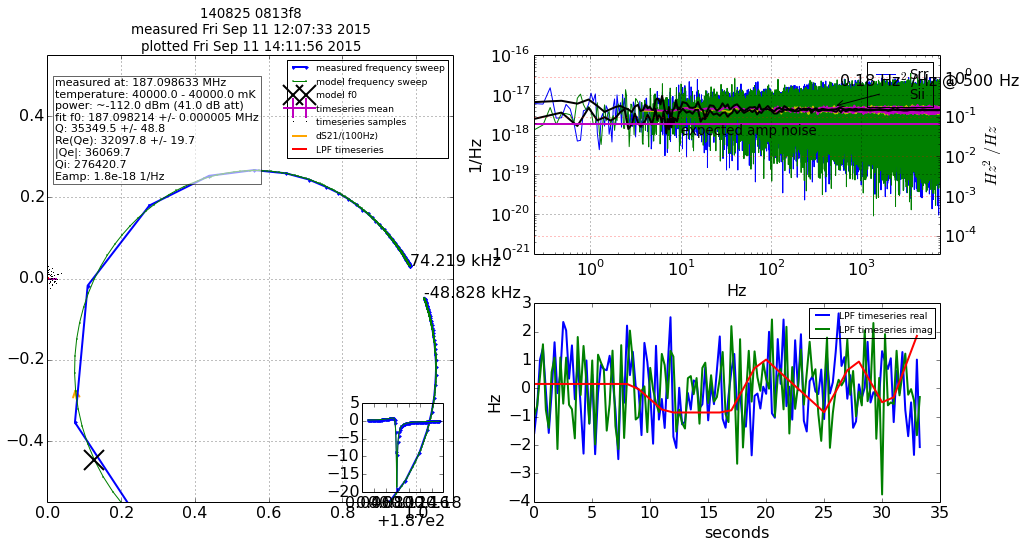

In [358]:
blah = p0.plot()

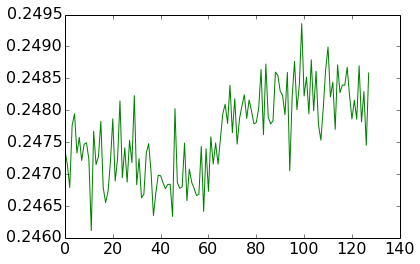

In [288]:
plot(kid_readout.utils.filters.low_pass_fir(p0.folded_normalized_timeseries).real)
plot(p0.folded_normalized_timeseries.real)

[ 8.  8.]
3.07617e-06


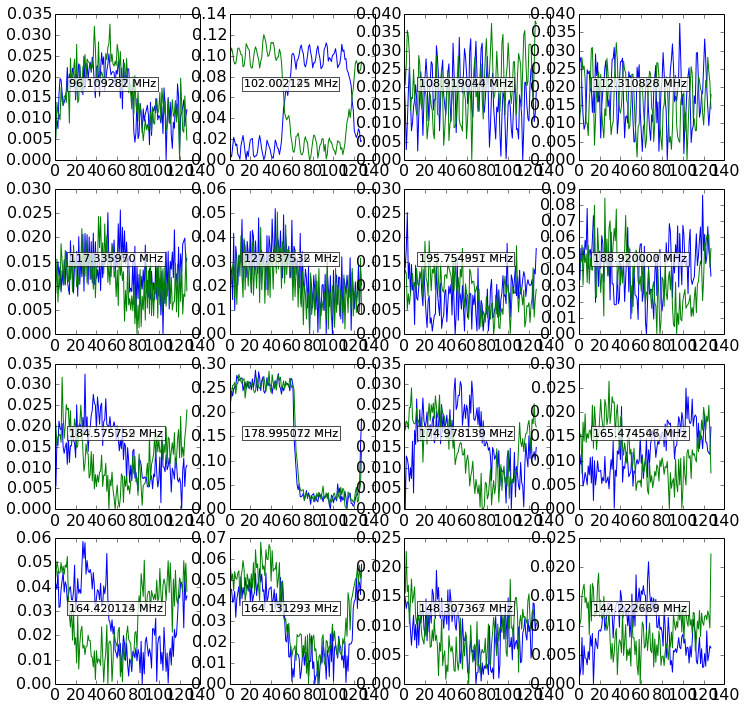

In [340]:
fig,axs = plt.subplots(4,4,figsize=(12,12))
for k in range(16):
    ax= axs.flatten()[k]
    for p0 in pfs[k::16]:
        x = 1e6*kid_readout.analysis.resonator.normalized_s21_to_detuning(
                (p0.folded_normalized_timeseries),p0.resonator_model)
        ax.plot(x-x.min())
        ax.text(0.1,0.5,('%f MHz' % p0.resonator_model.f_0),bbox=dict(facecolor='w',alpha=0.5),transform=ax.transAxes,size='x-small')
print p0.mmw_atten_turns
print p0.zbd_voltage

[ 7.  7.]
5.41324e-05


(0, 0.3)

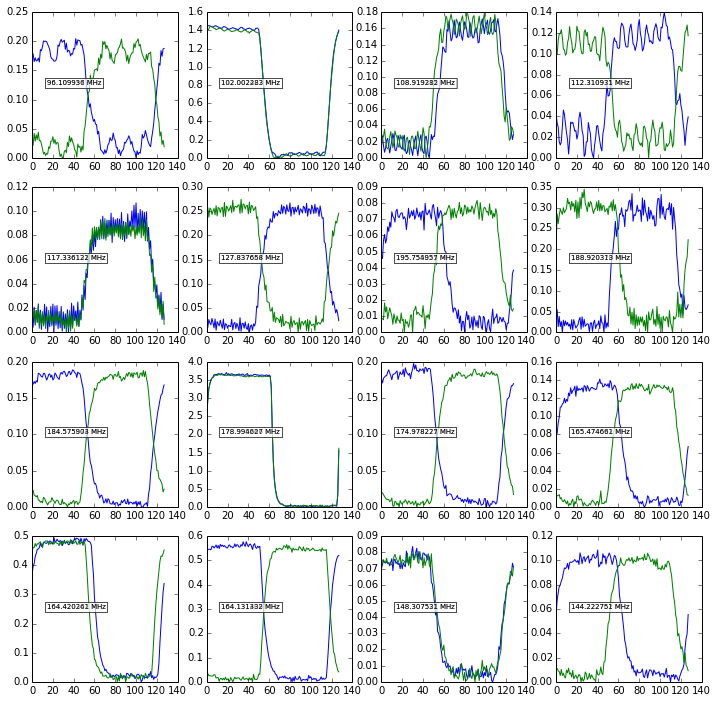

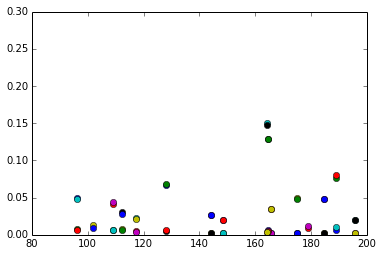

In [60]:
fig,axs = plt.subplots(4,4,figsize=(12,12))
f2,ax2 = plt.subplots(1,1)
for k in range(16):
    ax= axs.flatten()[k]
    for p0 in pfs[k::16]:
        x = 1e6*kid_readout.analysis.resonator.normalized_s21_to_detuning(
                (p0.folded_normalized_timeseries),p0.resonator_model)
        x = x - x.min()
        ax.plot(x)
        ax.text(0.1,0.5,('%f MHz' % p0.resonator_model.f_0),bbox=dict(facecolor='w',alpha=0.5),transform=ax.transAxes,size='x-small')
        ax2.plot(p0.resonator_model.f_0,np.median(x[:64])/3.7,'o')
        ax2.plot(p0.resonator_model.f_0,np.median(x[64:])/3.7,'o')
        
print p0.mmw_atten_turns
print p0.zbd_voltage
ax2.set_ylim(0,0.3)

[ 7.5  7.5]
1.56724e-05


(0, 0.3)

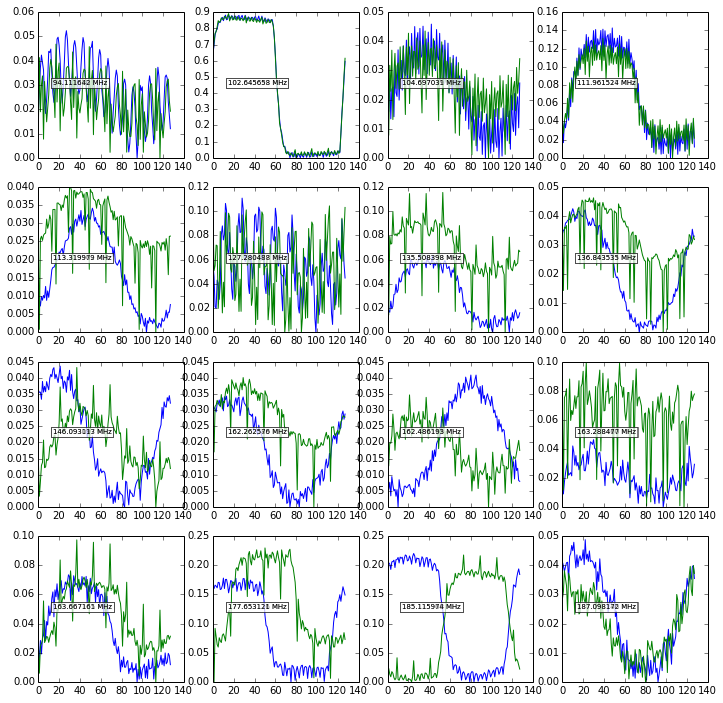

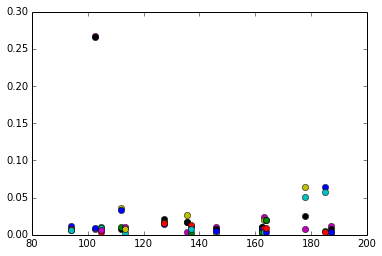

In [88]:
fig,axs = plt.subplots(4,4,figsize=(12,12))
f2,ax2 = plt.subplots(1,1)
for k in range(16):
    ax= axs.flatten()[k]
    for p0 in pfstin[k::16]:
        x = 1e6*kid_readout.analysis.resonator.normalized_s21_to_detuning(
                (p0.folded_normalized_timeseries),p0.resonator_model)
        x = x - x.min()
        ax.plot(x)
        ax.text(0.1,0.5,('%f MHz' % p0.resonator_model.f_0),bbox=dict(facecolor='w',alpha=0.5),transform=ax.transAxes,size='x-small')
        ax2.plot(p0.resonator_model.f_0,np.median(x[:64])/3.2,'o')
        ax2.plot(p0.resonator_model.f_0,np.median(x[64:])/3.2,'o')
        
print p0.mmw_atten_turns
print p0.zbd_voltage
ax2.set_ylim(0,0.3)

In [ ]:
p0.timestream_modulation_freq

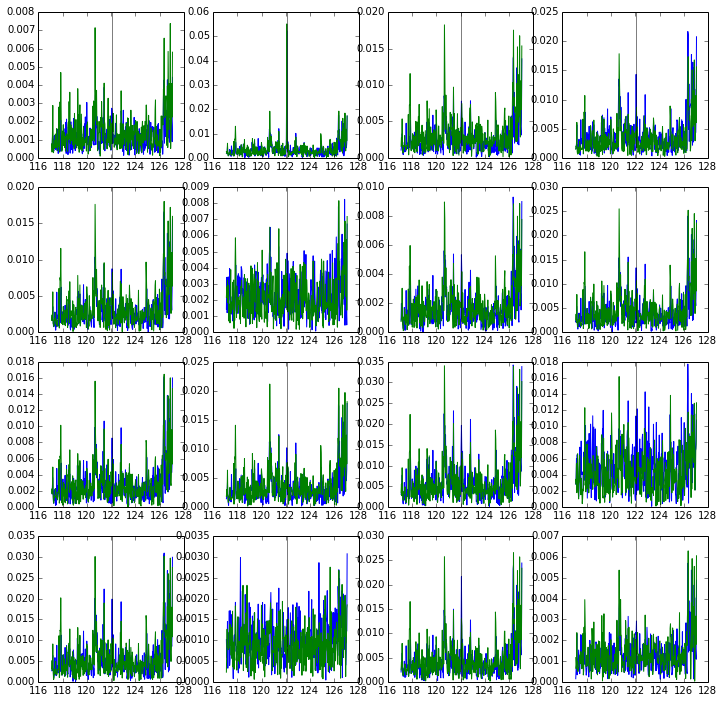

In [82]:
fig,axs = plt.subplots(4,4,figsize=(12,12))
for k in range(16):
    ax= axs.flatten()[k]
    for p0 in pfstin[k::16]:
        pxx = np.abs(np.fft.rfft(p0.fractional_fluctuation_timeseries.imag))
        fr = np.fft.fftfreq(len(p0.fractional_fluctuation_timeseries*2))[:len(pxx)]*512e6/2**15
        mask = np.abs(fr-p0.timestream_modulation_freq) < 5
        ax.plot(fr[mask],(pxx[mask])*1e6/(len(pxx)-1))
    ax.axvline(p0.timestream_modulation_freq,color='k',alpha=0.5)

In [281]:
p12 = pfs[9]

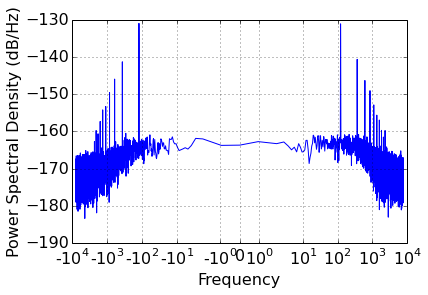

In [282]:
blah = psd(p12.fractional_fluctuation_timeseries,NFFT=2**14,Fs=256e6/2**14)
xscale('symlog')

In [9]:
import kid_readout.utils.readoutnc

In [31]:
!ls -lhtr /data/readout/pkl/2015-08-*

-rwxrwxr-x. 1 readout readout 21M Aug 10 13:22 /data/readout/pkl/2015-08-10_122505_mmw.pkl
-rwxrwxr-x. 1 readout readout 21M Aug 10 14:28 /data/readout/pkl/2015-08-10_134303_mmw.pkl
-rwxrwxr-x. 1 readout readout 21M Aug 10 15:00 /data/readout/pkl/2015-08-10_141500_mmw.pkl
-rwxrwxr-x. 1 readout readout 21M Aug 10 15:29 /data/readout/pkl/2015-08-10_144356_mmw.pkl
-rwxrwxr-x. 1 readout readout 17M Aug 10 16:04 /data/readout/pkl/2015-08-10_152758_temperature.pkl
-rwxrwxr-x. 1 readout readout 17M Aug 10 17:28 /data/readout/pkl/2015-08-10_165228_temperature.pkl
-rwxrwxr-x. 1 readout readout 17M Aug 10 18:09 /data/readout/pkl/2015-08-10_173253_temperature.pkl
-rwxrwxr-x. 1 readout readout 17M Aug 10 19:12 /data/readout/pkl/2015-08-10_182646_temperature.pkl
-rwxrwxr-x. 1 readout readout 17M Aug 10 19:52 /data/readout/pkl/2015-08-10_191635_temperature.pkl
-rwxrwxr-x. 1 readout readout 17M Aug 10 20:47 /data/readout/pkl/2015-08-10_201039_temperature.pkl
-rwxrwxr-x. 1 readout readout 17M Aug 10 2

In [12]:
rnc = kid_readout.utils.readoutnc.ReadoutNetCDF('/data/readout/2015-08-06_164147.nc')